
# The Spark Foundation

## Data Science And Bussiness Analytics(Task- 1)

### Prediction using Unsupervised ML
  
 #### Author : Shivam Kumar

 -  Performing K-Means Clustering on Irish Dataset.
 -  Predicting the optimal Number of clustering on Irish Dataset and represent it visually.
 -  Dataset :- https://bit.ly/3kXTdox






In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.shape # checking the shape of the data

(150, 4)

 - Number of Rows : 150
 
 -  Number of Columns : 4

# Exploratory Data Analysis

###  Checking Missing value

In [5]:
df.isnull().sum().to_frame('Missing Value') 

,Missing Value
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


 - Conclusion : No Null values presents in the dataset.

### Checking Data Type

In [6]:
df.dtypes.to_frame('Data type') #Checking data type

,Data type
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64


###  Summary for numerical variables

In [7]:
df.describe() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking Outliers

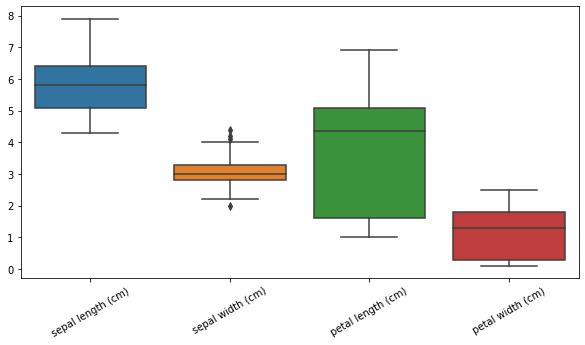

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation=30)
plt.show()

 - As we can see Outliers present in the sepal width, So we will check  separately.

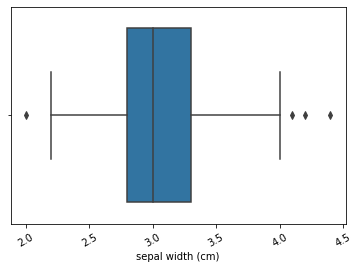

In [9]:
sns.boxplot(df['sepal width (cm)'])
plt.xticks(rotation=30)
plt.show()

 - As  We can see the outliers are not consistent and very few in numbers, so we will leave them as it is.

### Checking Correlation of Features

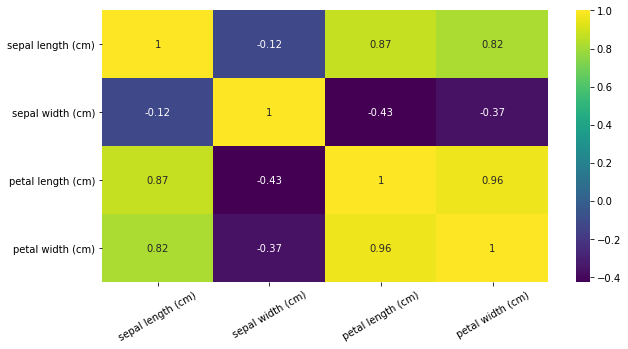

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.xticks(rotation=30)
plt.show()

 - As we can see from above strong correlation between PetalLength with PetalWidth and SepalLength. Also SepalLength is also highly correlated with PetalWidth.

# Performing Standardisation

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [12]:
df1 = sc.fit_transform(df)
df1 = pd.DataFrame(df1,columns=df.columns)

In [13]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## K- Means_ Clustering

In [14]:
# Finding the optimum number of clusters for k-means using silhouette_coefficients
x = df1.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans

cluster_range = range(1,11)
WCSS=[]

for num_cluster in cluster_range:
    cluster = KMeans(num_cluster,n_init=5)
    cluster.fit(df1)
    labels = cluster.labels_
    centroids =cluster.cluster_centers_
    WCSS.append(cluster.inertia_)
    
cluster_df = pd.DataFrame({'Num_cluster':cluster_range,'WCSS':WCSS})
cluster_df[0:11]

,Num_cluster,WCSS
0,1,600.000000
1,2,222.361705
2,3,139.820496
3,4,114.353763
4,5,90.879389
5,6,81.902212
6,7,71.840788
7,8,64.643232
8,9,56.712676
9,10,49.527404


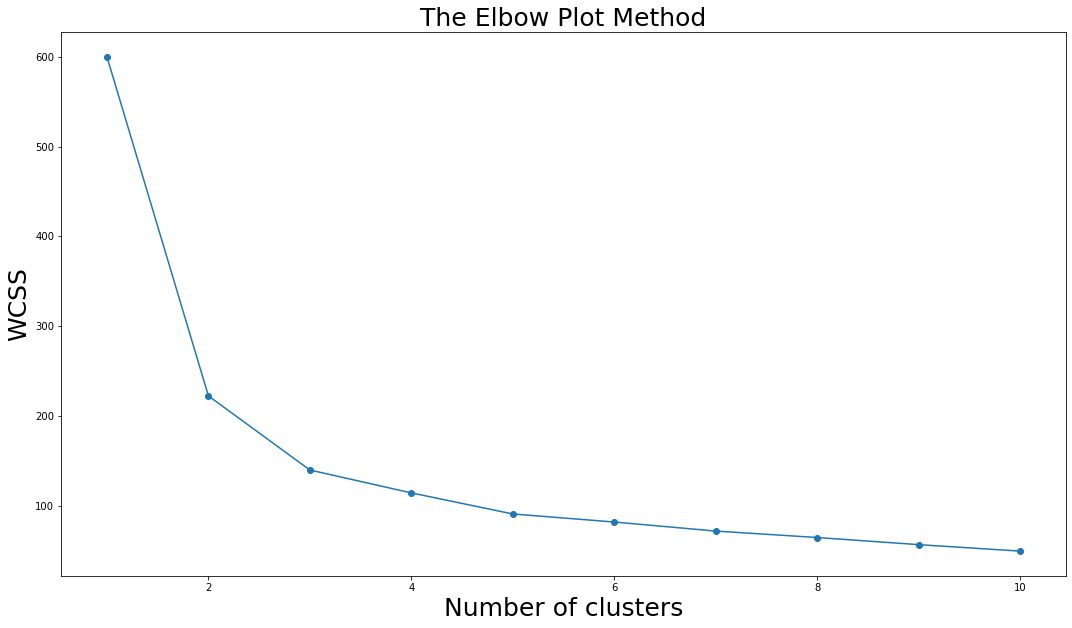

In [15]:
# Finding the optimum number of clusters for k-means using elbo plot method

# Plotting the results onto a line graph
plt.figure(figsize=(18,10))
plt.plot(cluster_df.Num_cluster,cluster_df.WCSS,marker='o')
plt.title('The Elbow Plot Method',fontsize=25)
plt.xlabel('Number of clusters',fontsize=25)
plt.ylabel('WCSS', fontsize=25) 
plt.show()

From the above elbow plot with the wcss value we can see that there a elbow forming at 3 clusters.
After 3 clusters the change in WCSS value tends to decreases.
But usually client or the subject matter expert will guide us in picking the number of clusters
We will go with that number. It may also based on the business needs .
Here we are choosing it just alone by seeing the WCSS values.
So 3 clusters are chosen

In [16]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

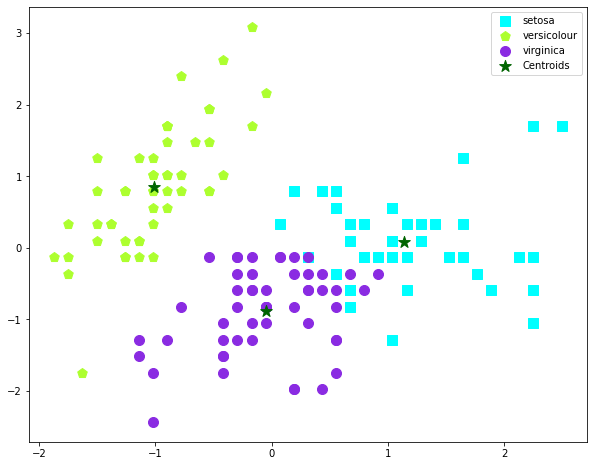

In [20]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'aqua', label = 'setosa',marker='s')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'greenyellow', label = 'versicolour',marker='p')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blueviolet', label = 'virginica')
# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 150, c = 'darkgreen', label = 'Centroids',marker='*')

plt.legend()
plt.show()

                     


# ------------------------Thank You---------------------------------